# San Fransisco and the Pandemie: Impacts on bike rentals
## by Bijan Fallah 

## Investigation Overview

> Based on bike rental data since 2018 to 202007, I decided to draw some conclusions on the impact of the COVID-19 Pandemie on 
San Fransisco's bike rental behaviours. 

## Dataset Overview

>The Baywheels offers all residents of the Bay Area an affordable, accessible, and fun new transportation option. Low-income residents qualify for a discounted membership  https://www.lyft.com/bikes/bay-wheels . They provide their data freely accessibale for data analysis. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from pathlib import Path
import zipfile
import glob
import matplotlib
from mpl_toolkits.basemap import Basemap
from matplotlib.gridspec import GridSpec

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# unpickle the data : 
df_final = pd.read_pickle("./data_final_for_vis.pkl")


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Weekly Cycle of Bike renting

> There is a weekly cycle in bike rides from 2018 to 2020-07. During weekend people will rent less and they rent the bike for going to work maybe.
> The peak belongs to Tuesday, Wendesday and Thursday. There might be people who do not have a full time job? 

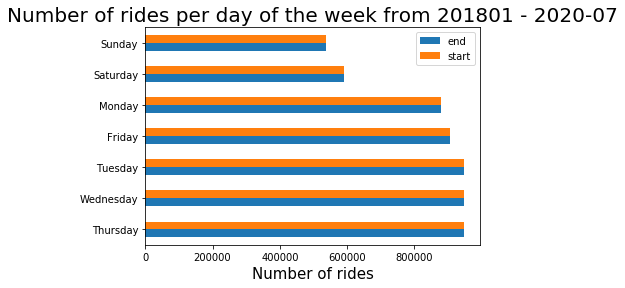

In [16]:
# plot number of rides falling in day of the week : 
# for start day : 

df_start_dow = df_final.start_dow.value_counts()
# for end day: 
df_end_dow = df_final.end_dow.value_counts()
#index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
index = ["Thursday","Wednesday", "Tuesday","Friday","Monday","Saturday","Sunday"]
df = pd.DataFrame({'start': df_start_dow.values,
                    'end': df_end_dow.values}, index=df_start_dow.index)
ax = df.plot.barh()
ax.set_yticklabels(index)
plt.title('Number of rides per day of the week from 201801 - 2020-07', fontsize=20)
plt.xlabel('Number of rides',fontsize=15);

## Diurnal Cycle of bike renting

- How about diurnal cycle? During which hours we have the maximum rentals? 
- The plot shows that during 2019 the morning and afternoon peaks were higher in number of rentals. However, for all years there exists the morning and afternoon peaks. 
Which might point to the time people go to work (7 am) and come back from work (4 pm).



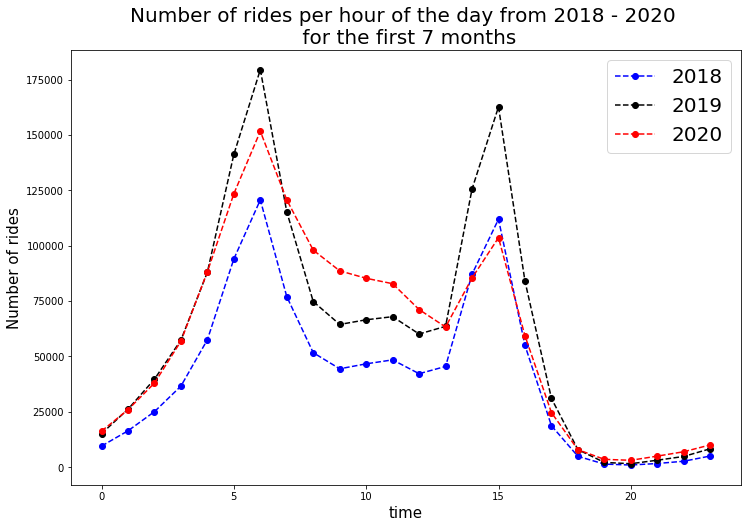

In [24]:
# plot number of rides falling in hour of the day : 
# for start time : 
%matplotlib inline
plt.figure(figsize=(12,8))
df_start_hod_2018 = df_final[(df_final.start_year==2018) & (df_final.start_month<8)].start_hour.value_counts()
df_start_hod_2019 = df_final[(df_final.start_year==2019) & (df_final.start_month<8)].start_hour.value_counts()
df_start_hod_2020 = df_final[(df_final.start_year==2020) & (df_final.start_month<8)].start_hour.value_counts()

plt.plot(df_start_hod_2018.sort_index(ascending=False).values,'b--o',label="2018")
plt.plot(df_start_hod_2019.sort_index(ascending=False).values,'k--o',label="2019")
plt.plot(df_start_hod_2020.sort_index(ascending=False).values,'r--o',label="2020")

plt.title('Number of rides per hour of the day from 2018 - 2020 \n for the first 7 months', fontsize=20)
plt.xlabel('time',fontsize=15)
plt.ylabel('Number of rides',fontsize=15)
plt.legend(fontsize=20);

## Bike rents duration over the 3 regions

> How do the duration in seconds look like for the 3 domains of rental bikes? 
> here I plot the maps of duration in seconds. 
> Region 1 San Fransisco has the most rentals and the highest durations in seconds. 


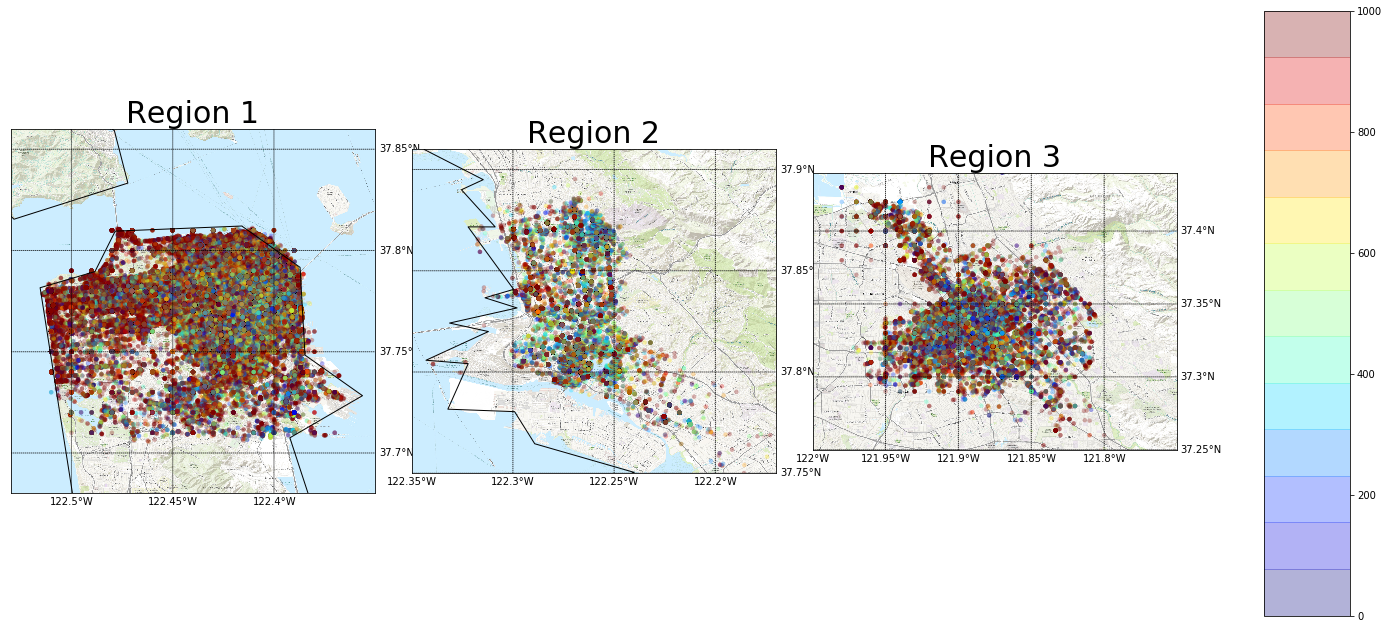

In [23]:
N= df_final.shape[0]
#N=500000
#http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html
my_dpi = 200
map = Basemap(llcrnrlon=-122.53, llcrnrlat=37.68, 
              urcrnrlon=-122.35, urcrnrlat=37.86,resolution='i')

fig = plt.figure(figsize=(24,12))
gs = GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.1, hspace=0.3)
############################################################################  1

ax0 = fig.add_subplot(gs[0, 0])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
cmap = plt.cm.get_cmap("jet", 13)
c = map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= False);

lon = df_final.iloc[:N].start_station_longitude
lat = df_final.iloc[:N].start_station_latitude

xpt,ypt = map(lon,lat)
value = df_final.iloc[:N].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.3)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1", fontsize=30)
plt.tight_layout()
############################################################################## 2
map = Basemap(llcrnrlon=-122.35, llcrnrlat=37.75, 
              urcrnrlon=-122.17,  urcrnrlat=37.91,resolution='i')
ax0 = fig.add_subplot(gs[0, 1])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
cmap = plt.cm.get_cmap("jet", 13)
c = map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= False)


value = df_final.iloc[:N].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.3)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 2", fontsize=30)
plt.tight_layout()
############################################################################## 3
ax0 = fig.add_subplot(gs[0, 2])
#--------------------------------------------------------------
map = Basemap(llcrnrlon=-122.0, llcrnrlat=37.25, 
              urcrnrlon=-121.75,  urcrnrlat=37.44,resolution='i')


map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()

cmap = plt.cm.get_cmap("jet", 13)
c = map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= False)


value = df_final.iloc[:N].duration_sec
cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
                 c= value, alpha=.3)

parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 3", fontsize=30)
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cs, cax=cbar_ax)

plt.savefig('Start_points_duration_sec.png', format='png');

## Rush Hours Geographical Patterns

- It would be interesting to see how the points at 7 am (going to work) and points at 4 pm (going home) move in the 3 regions. 
- The maps show for example in reguin 1, the movements are abvious and you see a structure in downtown. 
- The blue points show the 7 am and the red ones the 4 pm points. 

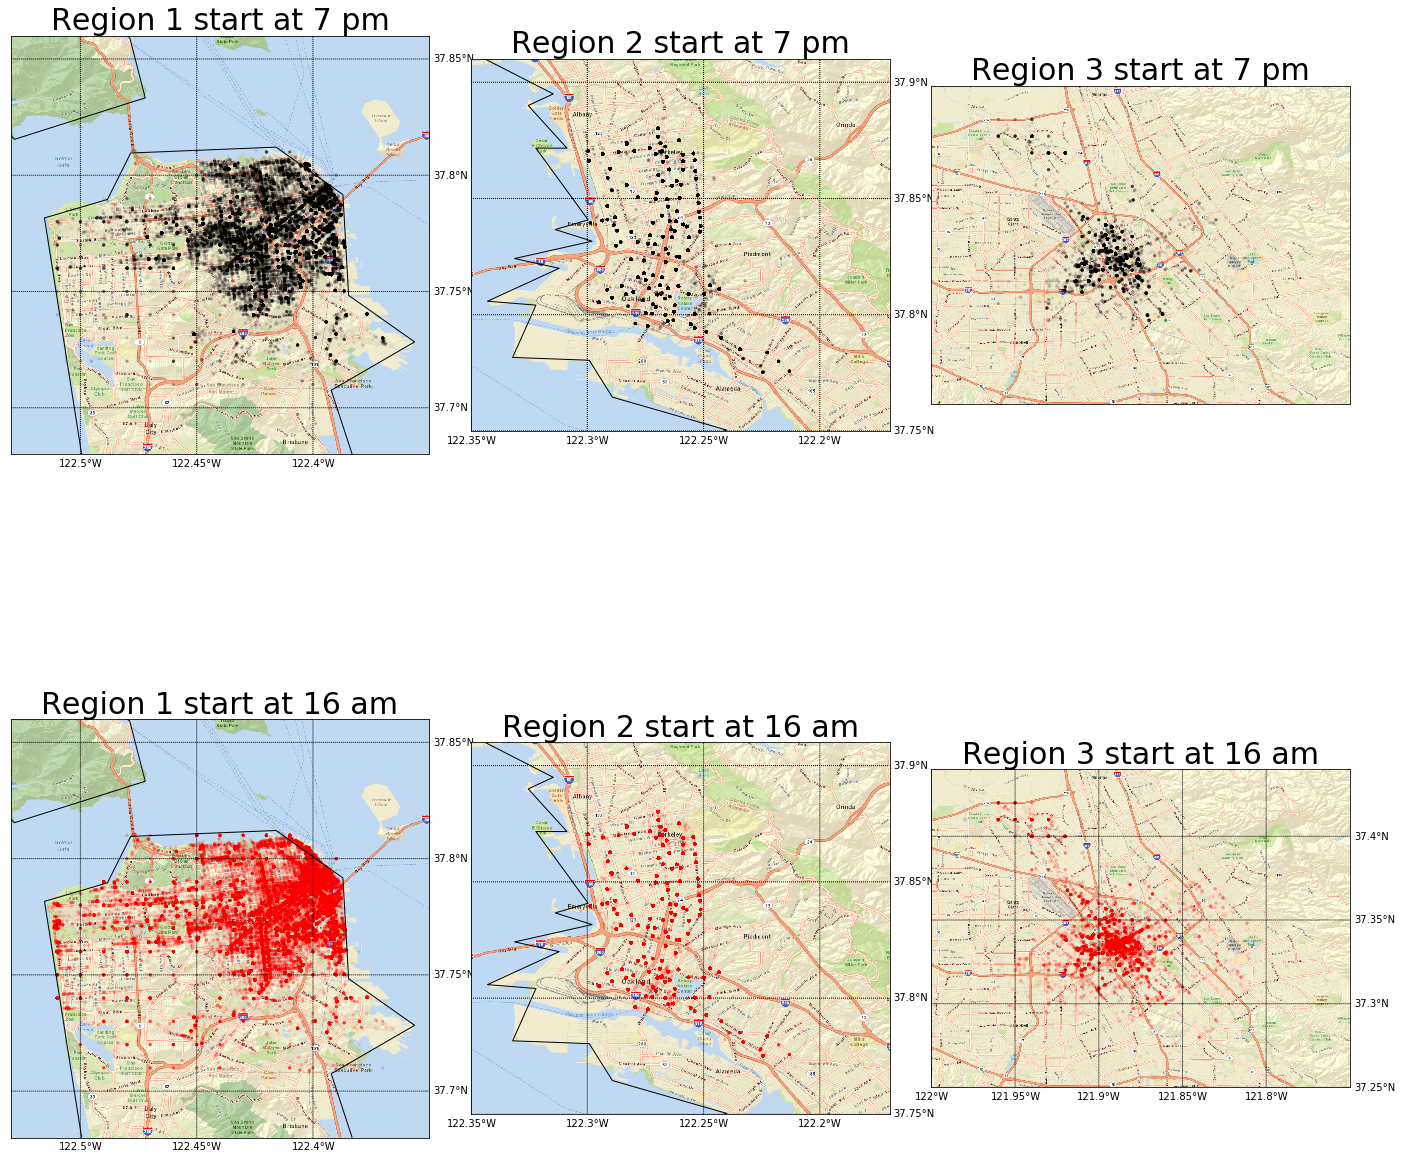

In [25]:
#N= df_final.shape[0]

#http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html
my_dpi = 200
map = Basemap(llcrnrlon=-122.53, llcrnrlat=37.68, 
              urcrnrlon=-122.35, urcrnrlat=37.86,resolution='i')


fig = plt.figure(figsize=(24,24))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace=0.1, hspace=0.1)
############################################################################  1

ax0 = fig.add_subplot(gs[0, 0])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False)
lon = df_final[df_final.start_hour == 7].start_station_longitude
lat = df_final[df_final.start_hour == 7].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'black', alpha=.1)



parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 start at 7 pm", fontsize=30)
plt.tight_layout()
############################################################################## 2
map = Basemap(llcrnrlon=-122.35, llcrnrlat=37.75, 
              urcrnrlon=-122.17,  urcrnrlat=37.91,resolution='i')
ax0 = fig.add_subplot(gs[0, 1])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False)
lon = df_final[df_final.start_hour == 7].start_station_longitude
lat = df_final[df_final.start_hour == 7].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'black', alpha=.1)


parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 2 start at 7 pm", fontsize=30)
plt.tight_layout()
############################################################################## 3
ax0 = fig.add_subplot(gs[0, 2])
#--------------------------------------------------------------
map = Basemap(llcrnrlon=-122.0, llcrnrlat=37.25, 
              urcrnrlon=-121.75,  urcrnrlat=37.44,resolution='i')

map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False)
lon = df_final[df_final.start_hour == 7].start_station_longitude
lat = df_final[df_final.start_hour == 7].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'black', alpha=.1)


parallels = np.arange(0.,81,.05)


plt.title("Region 3 start at 7 pm", fontsize=30)
plt.tight_layout()
######################
map = Basemap(llcrnrlon=-122.53, llcrnrlat=37.68, 
              urcrnrlon=-122.35, urcrnrlat=37.86,resolution='i')

ax0 = fig.add_subplot(gs[1, 0])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False)

lon = df_final[df_final.start_hour == 16].start_station_longitude
lat = df_final[df_final.start_hour == 16].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)


parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 1 start at 16 am", fontsize=30)
plt.tight_layout()
############################################################################## 2
map = Basemap(llcrnrlon=-122.35, llcrnrlat=37.75, 
              urcrnrlon=-122.17,  urcrnrlat=37.91,resolution='i')
ax0 = fig.add_subplot(gs[1, 1])
map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()

#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)

map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False)

lon = df_final[df_final.start_hour == 16].start_station_longitude
lat = df_final[df_final.start_hour == 16].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)
parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 2 start at 16 am", fontsize=30)
plt.tight_layout()
############################################################################## 3
ax0 = fig.add_subplot(gs[1, 2])
#--------------------------------------------------------------
map = Basemap(llcrnrlon=-122.0, llcrnrlat=37.25, 
              urcrnrlon=-121.75,  urcrnrlat=37.44,resolution='i')

map.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None, zorder=1)
map.drawcoastlines()
map.shadedrelief()
#map.etopo()
#map.arcgisimage(service='World_Topo_Map', xpixels = 1500, verbose= True)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False);


lon = df_final[df_final.start_hour == 16].start_station_longitude
lat = df_final[df_final.start_hour == 16].start_station_latitude


xpt,ypt = map(lon,lat)

cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)
parallels = np.arange(0.,81,.05)

map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,.05)
map.drawmeridians(meridians,labels=[True,False,False,True])
plt.title("Region 3 start at 16 am", fontsize=30)
plt.tight_layout()



plt.savefig('Start_End_points_movements.png', format='png');

## Movement Patterns Movie

- Now I zoom in region 1 and make a movie showing hourly changes of bike rental start points. 
- Interesting movements are abvious within the zooming region showing how the patterns change during the day. 


In [29]:
map = Basemap(llcrnrlon=-122.43, llcrnrlat=37.77, 
              urcrnrlon=-122.38, urcrnrlat=37.8,resolution='f')



for hour in range(0,24):
    #print('plotting '+str(hour))
    fig = plt.figure(figsize=(12,12))
    
    ############################################################################  1
    
    
    
    
    map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False)
    lon = df_final[df_final.start_hour == hour].start_station_longitude
    lat = df_final[df_final.start_hour == hour].start_station_latitude
    
    
    xpt,ypt = map(lon,lat)
    
    cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                     c= 'blue', alpha=.5)
    
    
    
    parallels = np.arange(0.,81,.01)
    
    map.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,.05)
    map.drawmeridians(meridians,labels=[True,False,False,True])
    plt.title("Region 1 start at "+str(hour)+" pm zoom", fontsize=30)
    plt.tight_layout()
    if hour < 10:
        plt.savefig("Start_points_at_0"+str(hour)+"_zoom.png", format='png');
    else:
        plt.savefig("Start_points_at_"+str(hour)+"_zoom.png", format='png');        
    plt.close()
    

import imageio
with imageio.get_writer('./movie.gif', mode='I', duration=1) as writer:
    for filename in sorted(glob.glob("./Start_points_at_*_zoom.png")):
        image = imageio.imread(filename)
        writer.append_data(image)

from IPython.display import HTML
HTML('<h1> <img src="./movie.gif">')

## Increaed bikesharing in 2020 

- I will plot the differences in bike rides on the map for each year from January to june between 2019 and 2020 
- **This is really important which shows that there existed a boom in bikesharing in 2020 during the pandemie!!!!**


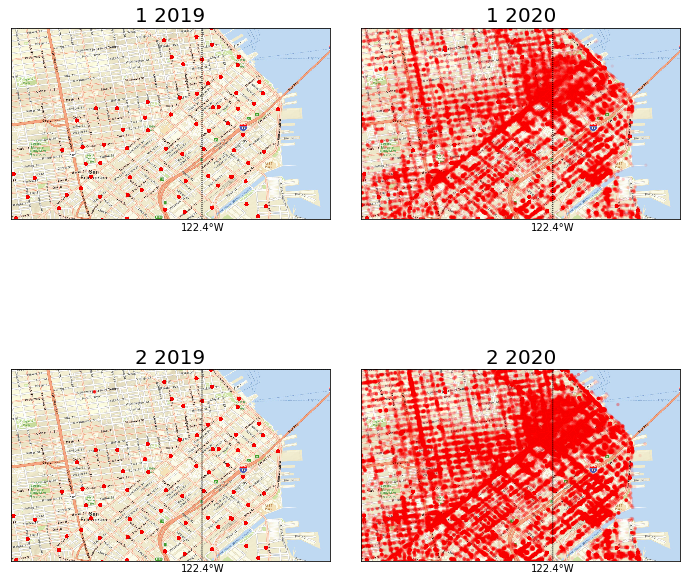

In [33]:
map = Basemap(llcrnrlon=-122.43, llcrnrlat=37.77, 
              urcrnrlon=-122.38, urcrnrlat=37.8,resolution='i')





def plot_month(year,month, column, row):
    
    
    ax0 = fig.add_subplot(gs[row, column])

    cmap = plt.cm.get_cmap("jet", 13)

    map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1200, verbose= False)
    lon = df_final[(df_final.start_year==year) & (df_final.start_month==month) ].start_station_longitude
    lat = df_final[(df_final.start_year==year) & (df_final.start_month==month) ].start_station_latitude
    
    xpt,ypt = map(lon,lat)
    #value = df_final[(df_final.start_year==year) & (df_final.start_month==month) ].duration_sec
    #cs = plt.scatter(xpt,ypt,edgecolors='none', vmin=0, vmax=1000,cmap=cmap,s=20,
    #                 c= value, alpha=.3)
    cs = plt.scatter(xpt,ypt,edgecolors='none',s=10,
                 c= 'red', alpha=.1)
    parallels = np.arange(0.,81,.05)
    
    map.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,.05)
    map.drawmeridians(meridians,labels=[True,False,False,True])
    plt.title(str(month)+" "+str(year), fontsize=20)
    #plt.tight_layout()
    #fig.colorbar(cs, cax=cbar_ax)
    
# now plot the matrix : 
fig = plt.figure(figsize=(12,12))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.1, hspace=0.1)
############################################################################  1

plot_month(2019,1, 0, 0)
plot_month(2020,1, 1, 0)

plot_month(2019,2, 0, 1)
plot_month(2020,2, 1, 1)



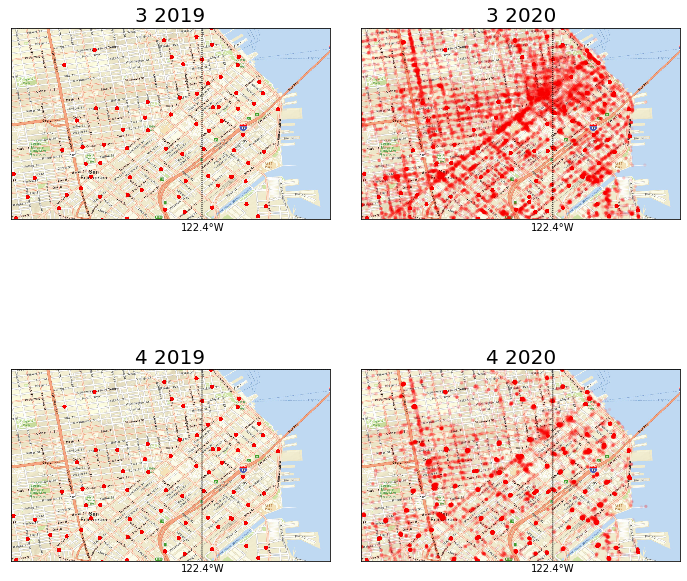

In [37]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.1, hspace=0.1)
############################################################################  1
plot_month(2019,3, 0, 0)
plot_month(2020,3, 1, 0)
plot_month(2019,4, 0, 1)
plot_month(2020,4, 1, 1)



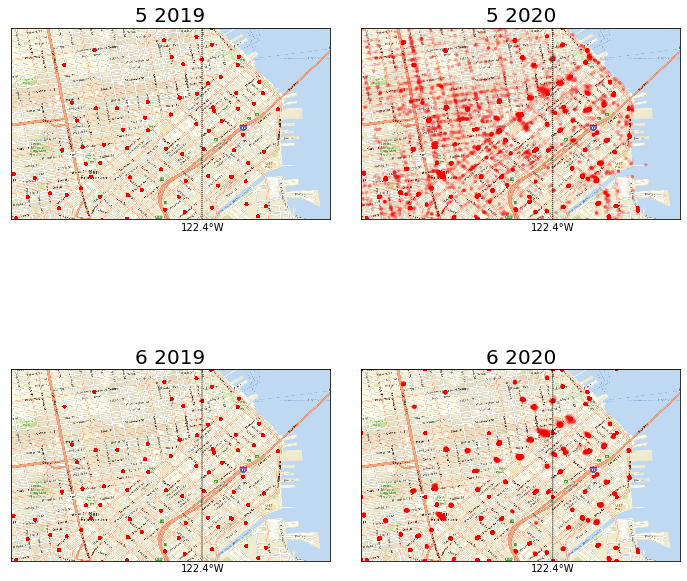

In [38]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.1, hspace=0.1)
############################################################################  1
plot_month(2019,5, 0, 0)
plot_month(2020,5, 1, 0)
plot_month(2019,6, 0, 1)
plot_month(2020,6, 1, 1)

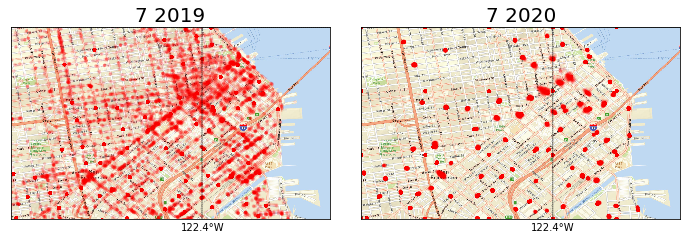

In [39]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.1, hspace=0.1)
############################################################################  1
plot_month(2019,7, 0, 0)
plot_month(2020,7, 1, 0)

## Number of rides per month: 

- This plots shows how the number of monthly rides evolve with time. 
- There is an increase at the begining of 2020, following with a drop in April 2020, maybe because of the pandemie! 


Text(0.5, 1.0, 'Number of rides  per month (sec)')

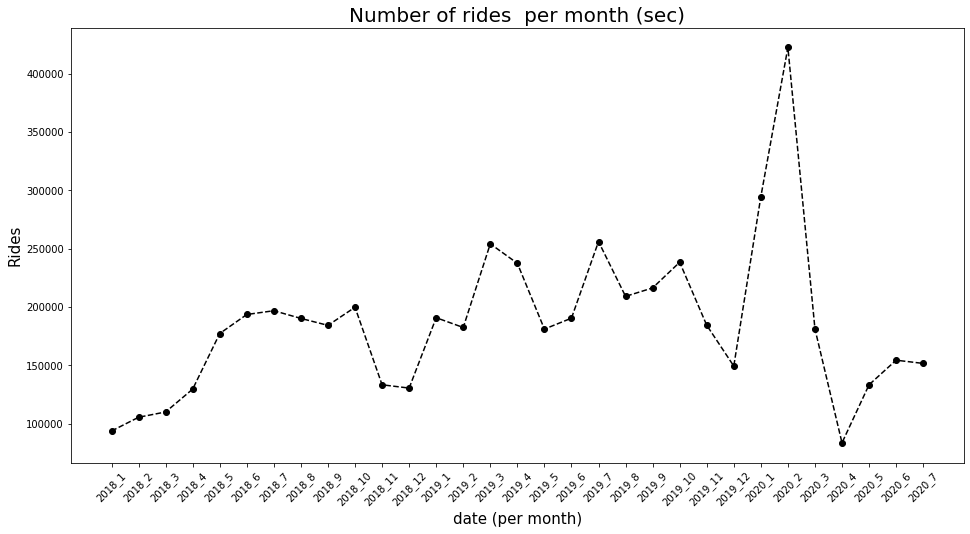

In [40]:
mon = 0
index = []
val = np.zeros(31)
for year in range(2018,2021):
    for month in range(1,13): 
        if (year == 2020) & (month> 7):
            break 
        
        val[mon]=len(df_final[(df_final.start_month==month) & (df_final.start_year==year)].duration_sec)
        index.append(str(year)+"_"+str(month))
        mon += 1
fig, ax = plt.subplots(figsize=(16,8))

plt.plot(range(31),val,'k--o'); 
ax.set_xticks(range(31))
ax.set_xticklabels(index, rotation = 45);
plt.xlabel("date (per month)",fontsize=15)
plt.ylabel("Rides", fontsize=15)
plt.title("Number of rides  per month (sec)", fontsize=20)

## The number of tourists in Pandemie? 

- The next plot shows the median of durations per month (sec) for durations > 3600 sec. My motivation was that I thought the number of tourists which will use the bike for some hours might have reduced during the pandemie. The plot shows people are using the rides to commute and not for sight-seeing and descovering the city. Look at this news: 

- https://www.ktvu.com/news/empty-streets-of-san-francisco-report-says-tourism-takes-hardest-hit-since-wwii

- According to them : **"The number of visitors is expected to be less than half of last year.**

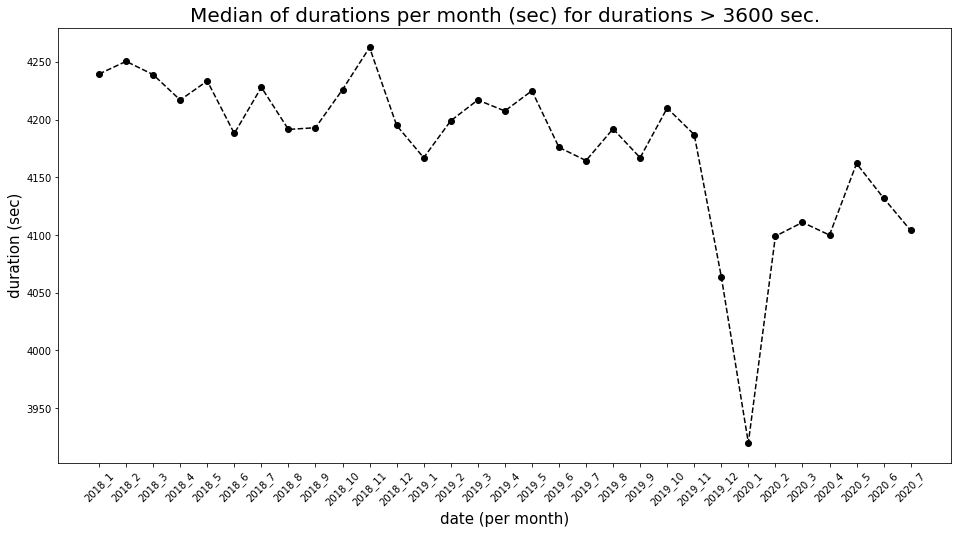

In [43]:
mon = 0
index = []
val = np.zeros(31)
for year in range(2018,2021):
    for month in range(1,13): 
        if (year == 2020) & (month> 7):
            break 
        
        val[mon]=np.median(df_final[(df_final.start_month==month) & (df_final.start_year==year) & (df_final.duration_sec >= 3600)].duration_sec)
        index.append(str(year)+"_"+str(month))
        mon += 1
fig, ax = plt.subplots(figsize=(16,8))

plt.plot(range(31),val,'k--o'); 
ax.set_xticks(range(31))
ax.set_xticklabels(index, rotation = 45);
plt.xlabel("date (per month)",fontsize=15)
plt.ylabel("duration (sec)", fontsize=15)
plt.title("Median of durations per month (sec) for durations > 3600 sec.", fontsize=20);

## New daily COVID-19 cases in san Fransisco

- What is interesting is that in 2020 during June and July the bike ride is reducing and at the same time the COVID-19 cases are increasing! 
- Shall people use bikes instead of public transportaions? or are they staying at home? or driving cars? 


In [42]:
%%html
<iframe src="https://app.powerbigov.us/view?r=eyJrIjoiYTkwY2Y5NzUtOWQ0MC00ZDljLTk0M2YtNTBkNGExYjkwYjY0IiwidCI6IjIyZDVjMmNmLWNlM2UtNDQzZC05YTdmLWRmY2MwMjMxZjczZiJ9&amp;navContentPaneEnabled=false&amp;filterPaneEnabled=false" width="1000" height="1000"></iframe>


> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

